# **BÁO CÁO ĐỒ ÁN CUỐI KỲ**
# Môn học: Kho dữ liệu và OLAP
# Mã lớp: IS217.O21.HTCL
# *Chủ đề: Dự đoán khả năng sinh lợi nhuận của đơn hàng*
# Danh sách thành viên:
1. Dương Văn Nhật Long - 20521561
2. Võ Đoàn Tố Loan - 20521544

# Import libraries and dataset

### Import libraries

In [1]:
# Import libraries for dataset manipulation and numerical operations
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libraries for machine learning models and evaluation
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Import libraries for model selection and evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Import libraries for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Import library for saving and loading models
import pickle

### Import dataset

In [2]:
df = pd.read_csv("data/Global_Superstore.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global_Orders_ID  51290 non-null  int64  
 1   Order_ID          51290 non-null  object 
 2   Category          51290 non-null  object 
 3   City              51290 non-null  object 
 4   Country           51290 non-null  object 
 5   Customer_Name     51290 non-null  object 
 6   Market            51290 non-null  object 
 7   Customer_ID       51290 non-null  object 
 8   Order_Date        51290 non-null  object 
 9   Ship_Date         51290 non-null  object 
 10  Order_Priority    51290 non-null  object 
 11  Product_ID        51290 non-null  object 
 12  Product_Name      51290 non-null  object 
 13  Region            51290 non-null  object 
 14  Segment           51290 non-null  object 
 15  Ship_Mode         51290 non-null  object 
 16  State             51290 non-null  object

# Exploratory Data Annalysis

In [4]:
# View 10 samples first
df.head(10)

,Global_Orders_ID,Order_ID,Category,City,Country,Customer_Name,Market,Customer_ID,Order_Date,Ship_Date,...,Region,Segment,Ship_Mode,State,Sub_Category,Discount,Profit,Quantity,Sales,Shipping_Cost
0,1,CA-2013-158568,Technology,Chicago,United States,Rick Bensley,USCA,RB-194654,8/28/2020,9/1/2020,...,Central,Home Office,Standard Class,Illinois,Accessories,0.2,-10.7973,3,95.976,10.01
1,2,CA-2013-158568,Office Supplies,Chicago,United States,Rick Bensley,USCA,RB-194654,8/28/2020,9/1/2020,...,Central,Home Office,Standard Class,Illinois,Binders,0.8,-3.0396,3,1.788,0.19
2,3,CA-2013-161207,Office Supplies,Concord,United States,Adam Bellavance,USCA,AB-100604,8/28/2020,9/2/2020,...,East,Home Office,Standard Class,New Hampshire,Supplies,0.0,8.0997,3,27.930,2.16
3,4,CA-2013-128727,Technology,New York City,United States,Meg O'Connel,USCA,MO-178004,8/28/2020,9/3/2020,...,East,Home Office,Standard Class,New York,Phones,0.0,5.5000,4,22.000,1.28
4,5,CA-2013-159912,Furniture,Philadelphia,United States,George Bell,USCA,GB-145304,8/28/2020,9/2/2020,...,East,Corporate,Standard Class,Pennsylvania,Tables,0.4,-56.4480,4,241.920,22.28
5,6,CA-2013-159912,Furniture,Philadelphia,United States,George Bell,USCA,GB-145304,8/28/2020,9/2/2020,...,East,Corporate,Standard Class,Pennsylvania,Bookcases,0.5,-81.9400,4,163.880,11.56
6,7,CA-2013-159912,Office Supplies,Philadelphia,United States,George Bell,USCA,GB-145304,8/28/2020,9/2/2020,...,East,Corporate,Standard Class,Pennsylvania,Binders,0.7,-2.7888,2,3.486,0.14
7,8,CA-2013-159912,Office Supplies,Philadelphia,United States,George Bell,USCA,GB-145304,8/28/2020,9/2/2020,...,East,Corporate,Standard Class,Pennsylvania,Fasteners,0.2,-2.3814,7,10.584,0.78
8,9,KE-2013-2920,Office Supplies,Nairobi,Kenya,Joe Kamberova,EMEA,JK-57301,8/28/2020,8/28/2020,...,Africa,Consumer,Same Day,Nairobi,Labels,0.0,9.4800,4,53.160,6.38
9,10,AG-2013-8490,Office Supplies,Algiers,Algeria,Sally Knutson,EMEA,SK-99901,8/28/2020,8/31/2020,...,Africa,Consumer,Second Class,Alger,Storage,0.0,43.3200,4,105.720,10.97


In [5]:
# View basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global_Orders_ID  51290 non-null  int64  
 1   Order_ID          51290 non-null  object 
 2   Category          51290 non-null  object 
 3   City              51290 non-null  object 
 4   Country           51290 non-null  object 
 5   Customer_Name     51290 non-null  object 
 6   Market            51290 non-null  object 
 7   Customer_ID       51290 non-null  object 
 8   Order_Date        51290 non-null  object 
 9   Ship_Date         51290 non-null  object 
 10  Order_Priority    51290 non-null  object 
 11  Product_ID        51290 non-null  object 
 12  Product_Name      51290 non-null  object 
 13  Region            51290 non-null  object 
 14  Segment           51290 non-null  object 
 15  Ship_Mode         51290 non-null  object 
 16  State             51290 non-null  object

In [6]:
# Count number of fearutes and samples
print("Number of features:", df.shape[1])
print("Number of samples :", df.shape[0])

Number of features: 23
Number of samples : 51290


In [7]:
# Statistical statistics of quantitative attributes such as: count the number of values, maximum, minimum, mean, standard deviation, quartiles...
df.describe(include='all')

,Global_Orders_ID,Order_ID,Category,City,Country,Customer_Name,Market,Customer_ID,Order_Date,Ship_Date,...,Region,Segment,Ship_Mode,State,Sub_Category,Discount,Profit,Quantity,Sales,Shipping_Cost
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
unique,NaN,25035,3,3636,147,795,4,4873,1429,1463,...,13,3,4,1086,17,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2014-100111,Office Supplies,New York City,United States,Muhammed Yedwab,EMEA,JG-158051,6/16/2021,11/20/2021,...,Central,Consumer,Standard Class,California,Binders,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,31273,915,9994,108,19616,40,135,130,...,11117,26518,30775,2001,6152,NaN,NaN,NaN,NaN,NaN
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.142908,28.610982,3.476545,246.490581,26.375818
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.212280,174.340972,2.278766,487.565361,57.296810
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,-6599.978000,1.000000,0.444000,0.002000
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,30.758625,2.610000
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,9.240000,3.000000,85.053000,7.790000
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.200000,36.810000,5.000000,251.053200,24.450000


In [8]:
# Print out each data type of each features
dtype = pd.DataFrame(data= {'types': df.dtypes})
dtype

,types
Global_Orders_ID,int64
Order_ID,object
Category,object
City,object
Country,object
Customer_Name,object
Market,object
Customer_ID,object
Order_Date,object
Ship_Date,object


In [9]:
# Count data type
dtype.value_counts()

types  
object     17
float64     4
int64       2
dtype: int64

In [10]:
# Check if dataset have missing values
df.isna().sum()

Global_Orders_ID    0
Order_ID            0
Category            0
City                0
Country             0
Customer_Name       0
Market              0
Customer_ID         0
Order_Date          0
Ship_Date           0
Order_Priority      0
Product_ID          0
Product_Name        0
Region              0
Segment             0
Ship_Mode           0
State               0
Sub_Category        0
Discount            0
Profit              0
Quantity            0
Sales               0
Shipping_Cost       0
dtype: int64

In [11]:
# Check if dataset have duplicate values
df.duplicated().sum()

0

# Data preprocessing

### Create the target column with a more descriptive name

In [12]:
df['Profit_Positive'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

### Drop useless column

In [13]:
drop_colums = ['Global_Orders_ID', 'Order_ID', 'Customer_Name', 'Customer_ID', 'Product_ID', 'Product_Name']
# Drop columns that are not meaningful for prediction
df = df.drop(columns=drop_colums)

### Check unique values in each columns

In [14]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Category: 3 distinct values
City: 3636 distinct values
Country: 147 distinct values
Market: 4 distinct values
Order_Date: 1429 distinct values
Ship_Date: 1463 distinct values
Order_Priority: 4 distinct values
Region: 13 distinct values
Segment: 3 distinct values
Ship_Mode: 4 distinct values
State: 1086 distinct values
Sub_Category: 17 distinct values
Discount: 27 distinct values
Profit: 24575 distinct values
Quantity: 14 distinct values
Sales: 22995 distinct values
Shipping_Cost: 16877 distinct values
Profit_Positive: 2 distinct values


### Data Type Conversion

In [15]:
df['Sales'] = df['Sales'].astype(int)

# Change the type of 'Order_Date' and 'Ship_Date'
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Extract day, weekday, month, quarter, year from Order_Date
df['day_order_date'] = df['Order_Date'].dt.day
df['weekday_order_date'] = df['Order_Date'].dt.weekday
df['month_order_date'] = df['Order_Date'].dt.month
df['quarter_order_date'] = df['Order_Date'].dt.quarter
df['year_order_date'] = df['Order_Date'].dt.year

# Extract day, weekday, month, quarter, year from Ship_Date
df['day_ship_date'] = df['Ship_Date'].dt.day
df['weekday_ship_date'] = df['Ship_Date'].dt.weekday
df['month_ship_date'] = df['Ship_Date'].dt.month
df['quarter_ship_date'] = df['Ship_Date'].dt.quarter
df['year_ship_date'] = df['Ship_Date'].dt.year

# Drop column Order_Date and Ship_Date
df = df.drop(columns=['Order_Date', 'Ship_Date'])

In [16]:
df.head()

,Category,City,Country,Market,Order_Priority,Region,Segment,Ship_Mode,State,Sub_Category,...,day_order_date,weekday_order_date,month_order_date,quarter_order_date,year_order_date,day_ship_date,weekday_ship_date,month_ship_date,quarter_ship_date,year_ship_date
0,Technology,Chicago,United States,USCA,Medium,Central,Home Office,Standard Class,Illinois,Accessories,...,28,4,8,3,2020,1,1,9,3,2020
1,Office Supplies,Chicago,United States,USCA,Medium,Central,Home Office,Standard Class,Illinois,Binders,...,28,4,8,3,2020,1,1,9,3,2020
2,Office Supplies,Concord,United States,USCA,Medium,East,Home Office,Standard Class,New Hampshire,Supplies,...,28,4,8,3,2020,2,2,9,3,2020
3,Technology,New York City,United States,USCA,Medium,East,Home Office,Standard Class,New York,Phones,...,28,4,8,3,2020,3,3,9,3,2020
4,Furniture,Philadelphia,United States,USCA,Medium,East,Corporate,Standard Class,Pennsylvania,Tables,...,28,4,8,3,2020,2,2,9,3,2020


### Correlation Analysis

In [17]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Discount,Profit,Quantity,Sales,Shipping_Cost,Profit_Positive,day_order_date,weekday_order_date,month_order_date,quarter_order_date,year_order_date,day_ship_date,weekday_ship_date,month_ship_date,quarter_ship_date,year_ship_date
Discount,1.000000,-0.316490,-0.019875,-0.086715,-0.079055,-0.796437,-0.004084,-0.010872,-0.000660,-0.000130,-0.005767,-0.003078,-0.000108,0.001290,0.001379,-0.006273
Profit,-0.316490,1.000000,0.104365,0.484911,0.354441,0.332106,-0.000358,0.006489,-0.000269,-0.000066,0.002685,0.004582,-0.003086,0.000303,0.001091,0.002435
Quantity,-0.019875,0.104365,1.000000,0.313588,0.272649,0.012270,0.003485,0.005389,0.020590,0.021764,-0.005012,-0.000597,0.004557,0.020329,0.021637,-0.004872
Sales,-0.086715,0.484911,0.313588,1.000000,0.768075,0.056126,0.001706,0.007840,0.001398,0.001733,-0.002779,0.002000,0.001917,0.003844,0.004035,-0.003417
Shipping_Cost,-0.079055,0.354441,0.272649,0.768075,1.000000,0.051025,0.004178,0.005856,0.004226,0.005438,-0.002933,-0.000408,0.017399,0.007401,0.007856,-0.004245
Profit_Positive,-0.796437,0.332106,0.012270,0.056126,0.051025,1.000000,0.005066,0.006001,0.001919,0.000663,0.000885,0.002629,0.002203,0.000788,-0.000233,0.001211
day_order_date,-0.004084,-0.000358,0.003485,0.001706,0.004178,0.005066,1.000000,0.003434,-0.007238,0.000345,-0.016298,0.371218,-0.014749,-0.009343,-0.002114,-0.002110
weekday_order_date,-0.010872,0.006489,0.005389,0.007840,0.005856,0.006001,0.003434,1.000000,0.001705,0.006036,-0.136537,-0.004758,-0.196564,0.006213,0.005683,-0.137157
month_order_date,-0.000660,-0.000269,0.020590,0.001398,0.004226,0.001919,-0.007238,0.001705,1.000000,0.970040,-0.014771,0.026664,0.000524,0.936842,0.916572,-0.001673
quarter_order_date,-0.000130,-0.000066,0.021764,0.001733,0.005438,0.000663,0.000345,0.006036,0.970040,1.000000,-0.015018,0.020942,-0.001190,0.916956,0.945228,-0.004110


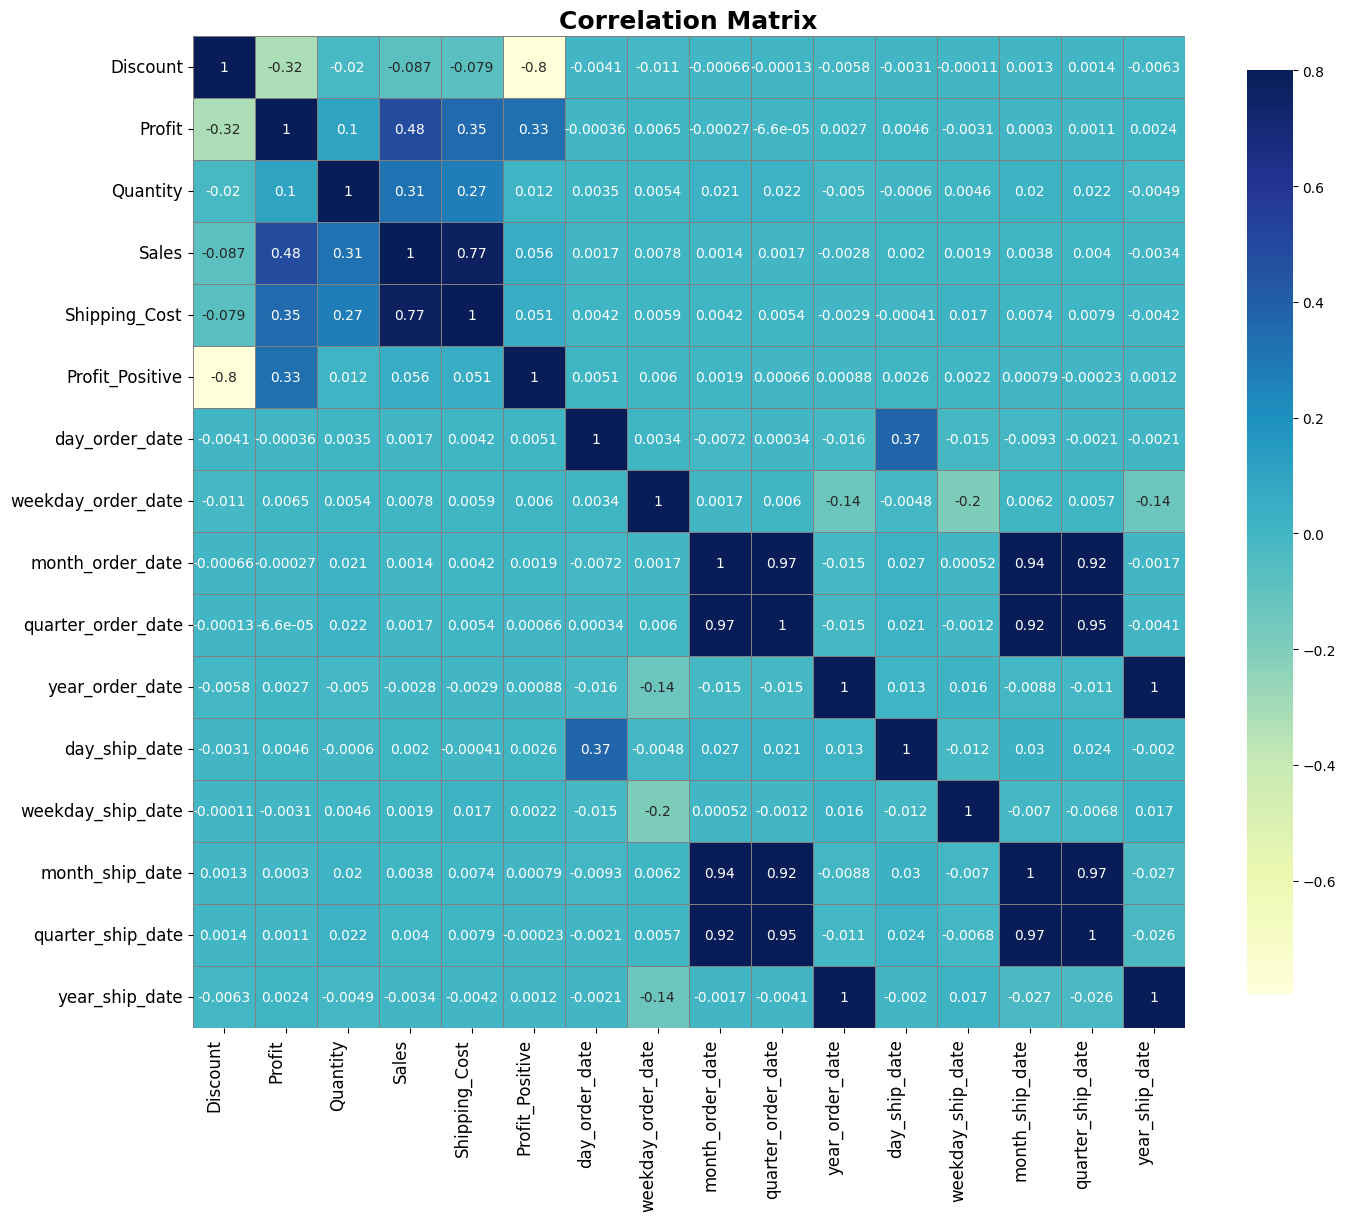

In [18]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(correlation_matrix, vmax=0.8, square=True, 
            annot=True, 
            cmap='YlGnBu',     
            annot_kws={"size": 10},  
            linewidths=0.5,     
            linecolor='gray',   
            cbar_kws={'shrink': 0.75},
            ax=ax)

plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.yticks(fontsize=12)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.show()

### Handling categories column

`Order_Priority` and `Ship_Mode`

In [19]:
df['Order_Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order_Priority, dtype: int64

In [20]:
df['Ship_Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship_Mode, dtype: int64

In [21]:
priority_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Critical': 4
}

ship_mode_mapping = {
    'Standard Class': 1,
    'Second Class': 2,
    'First Class': 3,
    'Same Day': 4
}

df['Order_Priority_Numeric'] = df['Order_Priority'].map(priority_mapping)
df['Ship_Mode_Numeric'] = df['Ship_Mode'].map(ship_mode_mapping)

`Category` , `Sub_Category`, `City`, `Country`, `State`, `Region`, `Market`, `Segment`

In [22]:
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [23]:
df['Sub_Category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub_Category, dtype: int64

In [24]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Fujisawa           1
Samobor            1
Tongling           1
Pleven             1
Vilhena            1
Name: City, Length: 3636, dtype: int64

In [25]:
df['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Burundi             2
Swaziland           2
Bahrain             2
South Sudan         2
Eritrea             2
Name: Country, Length: 147, dtype: int64

In [26]:
df['State'].value_counts()

California          2001
England             1499
New York            1128
Texas                985
Île-de-France        981
                    ... 
Atsimo-Andrefana       1
Tanga                  1
Setúbal                1
Casanare               1
Grand Gedeh            1
Name: State, Length: 1086, dtype: int64

In [27]:
df['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [28]:
df['Market'].value_counts()

EMEA     19616
APAC     11002
USCA     10378
LATAM    10294
Name: Market, dtype: int64

In [29]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [30]:
categorical_columns = ['Category', 'Sub_Category', 'City', 'Country', 'State', 'Region', 'Market', 'Segment']

+ Score 4: `Very High Profit` (Lợi nhuận rất cao) 
+ Score 3: `High Profit` (Lợi nhuận cao) 
+ Score 2: `Average Profit` (Lợi nhuận trung bình)
+ Score 1: `Low Profit` (Lợi nhuận thấp)
+ Score 0: `Loss` (Lợi nhuận âm)

In [31]:
def calculate_profit_score(df, column, target_column='Profit'):
    """
    Score the values ​​in the categorical column based on average return.

    Args:
    df (DataFrame): Original data.
    column (str): Name of the classification column to calculate score.
    target_column (str): Target column name (Profit).

    Returns:
    dict: Mapping from values ​​in categorical columns to scores.
    """

    # Calculate the average profit for each value in the categorical column
    mean_profit = df.groupby(column)[target_column].mean()
    
    # Calculate the percentiles of the average return
    quantiles = mean_profit.quantile([0.25, 0.5, 0.75])
    
    # Function assigns scores based on percentiles
    def assign_score(profit):
        if profit > quantiles[0.75]:
            return 4
        elif profit > quantiles[0.5]:
            return 3
        elif profit > quantiles[0.25]:
            return 2
        elif profit > 0:
            return 1
        else:
            return 0
    
    # Create mapping from value to point
    score_mapping = mean_profit.apply(assign_score).to_dict()
    
    return score_mapping

In [32]:
# Apply scoring to classification columns and assign scores
for col in categorical_columns:
    score_mapping = calculate_profit_score(df, col)
    df[f'{col}_Score'] = df[col].map(score_mapping)

### Split data into X, y

In [33]:
from sklearn.model_selection import train_test_split

drop_columns = ['Profit', 'Ship_Mode', 'Order_Priority', 'Category', 'Sub_Category', 'City', 'Country', 'State', 'Region', 'Market', 'Segment']

df_copy = df.copy()

df_copy= df_copy.drop(columns=drop_columns)

X = df_copy.drop(columns=['Profit_Positive'])
y = df_copy['Profit_Positive']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the initial model to identify important attributes

#### Using SelectKBest

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
# Use SelectKBest to select the 4 most important attributes
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X_train, y_train)

# Get the names of the most important attributes
selected_features = X_train.columns[selector.get_support()]

print("The 4 most important features:", selected_features)

The 4 most important features: Index(['Discount', 'City_Score', 'Country_Score', 'State_Score'], dtype='object')


#### Using Random Forest find importan features

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

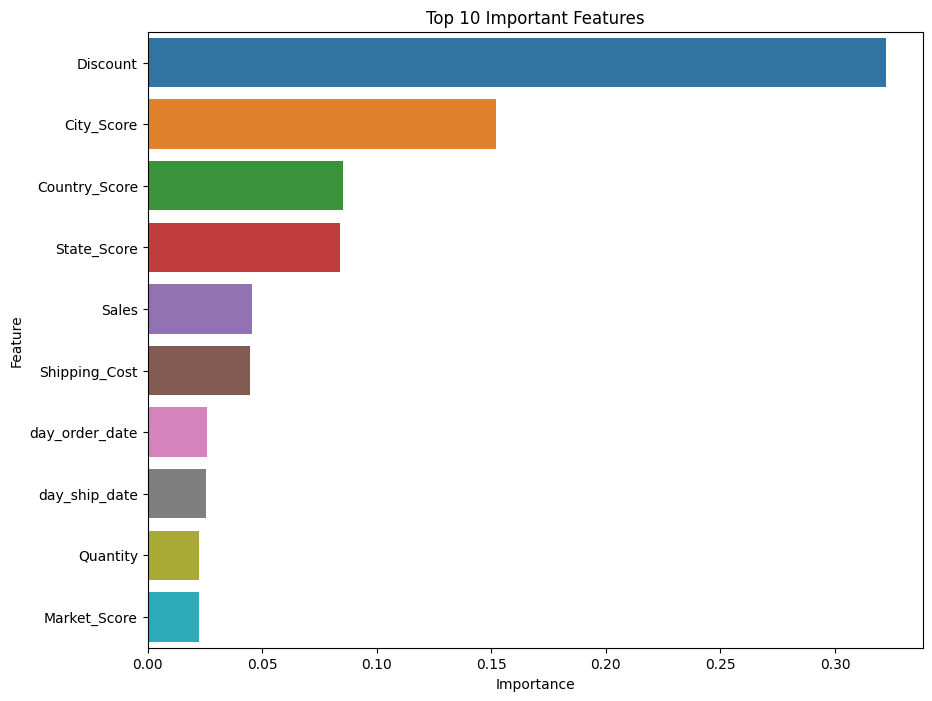

Top 4 Important Features:
          Feature  Importance
0        Discount    0.322130
18     City_Score    0.152114
19  Country_Score    0.085302
20    State_Score    0.083937


In [37]:
# Create the model pipeline
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X, y)

# Extract feature importances
feature_importances = model.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualize the top features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

# Print the top 4 important features
print("Top 4 Important Features:")
print(feature_importances_df.head(4))

=> Cả 2 phương pháp đều cho 4 thuộc tính quan trọng là `Discount`, `City_Score`, `Country_Score`, `State_Score`.

### Select again 4 important attributes to include in the Train set

In [38]:
X = df.drop(columns=['Profit_Positive'])
y = df['Profit_Positive']

In [39]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop columns
drop_columns = ['Profit', 'Ship_Mode', 'Order_Priority', 'Category', 'Sub_Category', 'City', 'Country', 'State', 'Region', 'Market', 'Segment']
X_train = X_train.drop(columns=drop_columns)
X_test = X_test.drop(columns=drop_columns)

In [40]:
# Select the top 4 important features
top_features = feature_importances_df.head(4)['Feature'].tolist()

# Filter the original DataFrame to keep only the top features
X_top_features = X[top_features]

In [41]:
# Split the data again with the selected top features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# DATA MINING ALGORITHMS

### Randon Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create a Grid Search CV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the model
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Accuracy for Random Forest: {accuracy_rf}')
print(f'Classification Report for Random Forest:\n{report_rf}')

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Accuracy for Random Forest: 0.9208422694482356
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2591
           1       0.93      0.97      0.95      7667

    accuracy                           0.92     10258
   macro avg       0.91      0.87      0.89     10258
weighted avg       0.92      0.92      0.92     10258



Text(0.5, 1.0, 'Random Forest Accuracy Score: 0.9208422694482356')

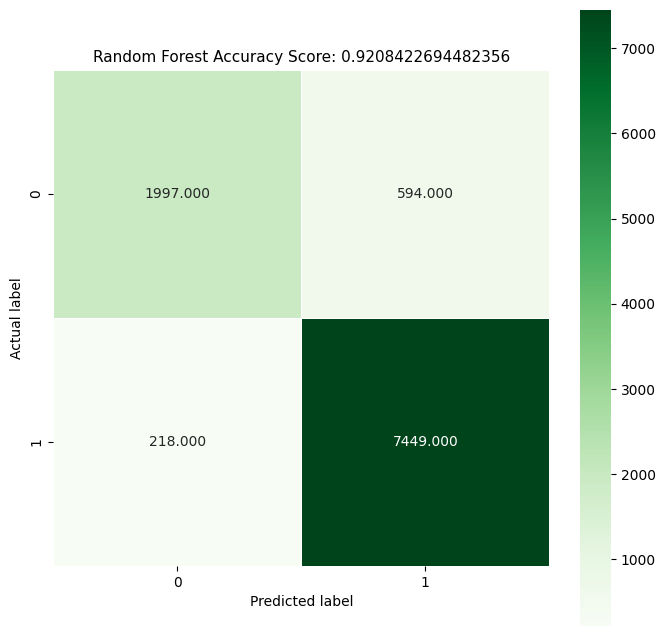

In [43]:
from sklearn import metrics

rd_cm = metrics.confusion_matrix(y_test,y_pred_rf)
rd_score = metrics.accuracy_score(y_test, y_pred_rf)

plt.figure(figsize=(8,8))
sns.heatmap(rd_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Random Forest Accuracy Score: {0}'.format(rd_score)
plt.title(title, size = 11)

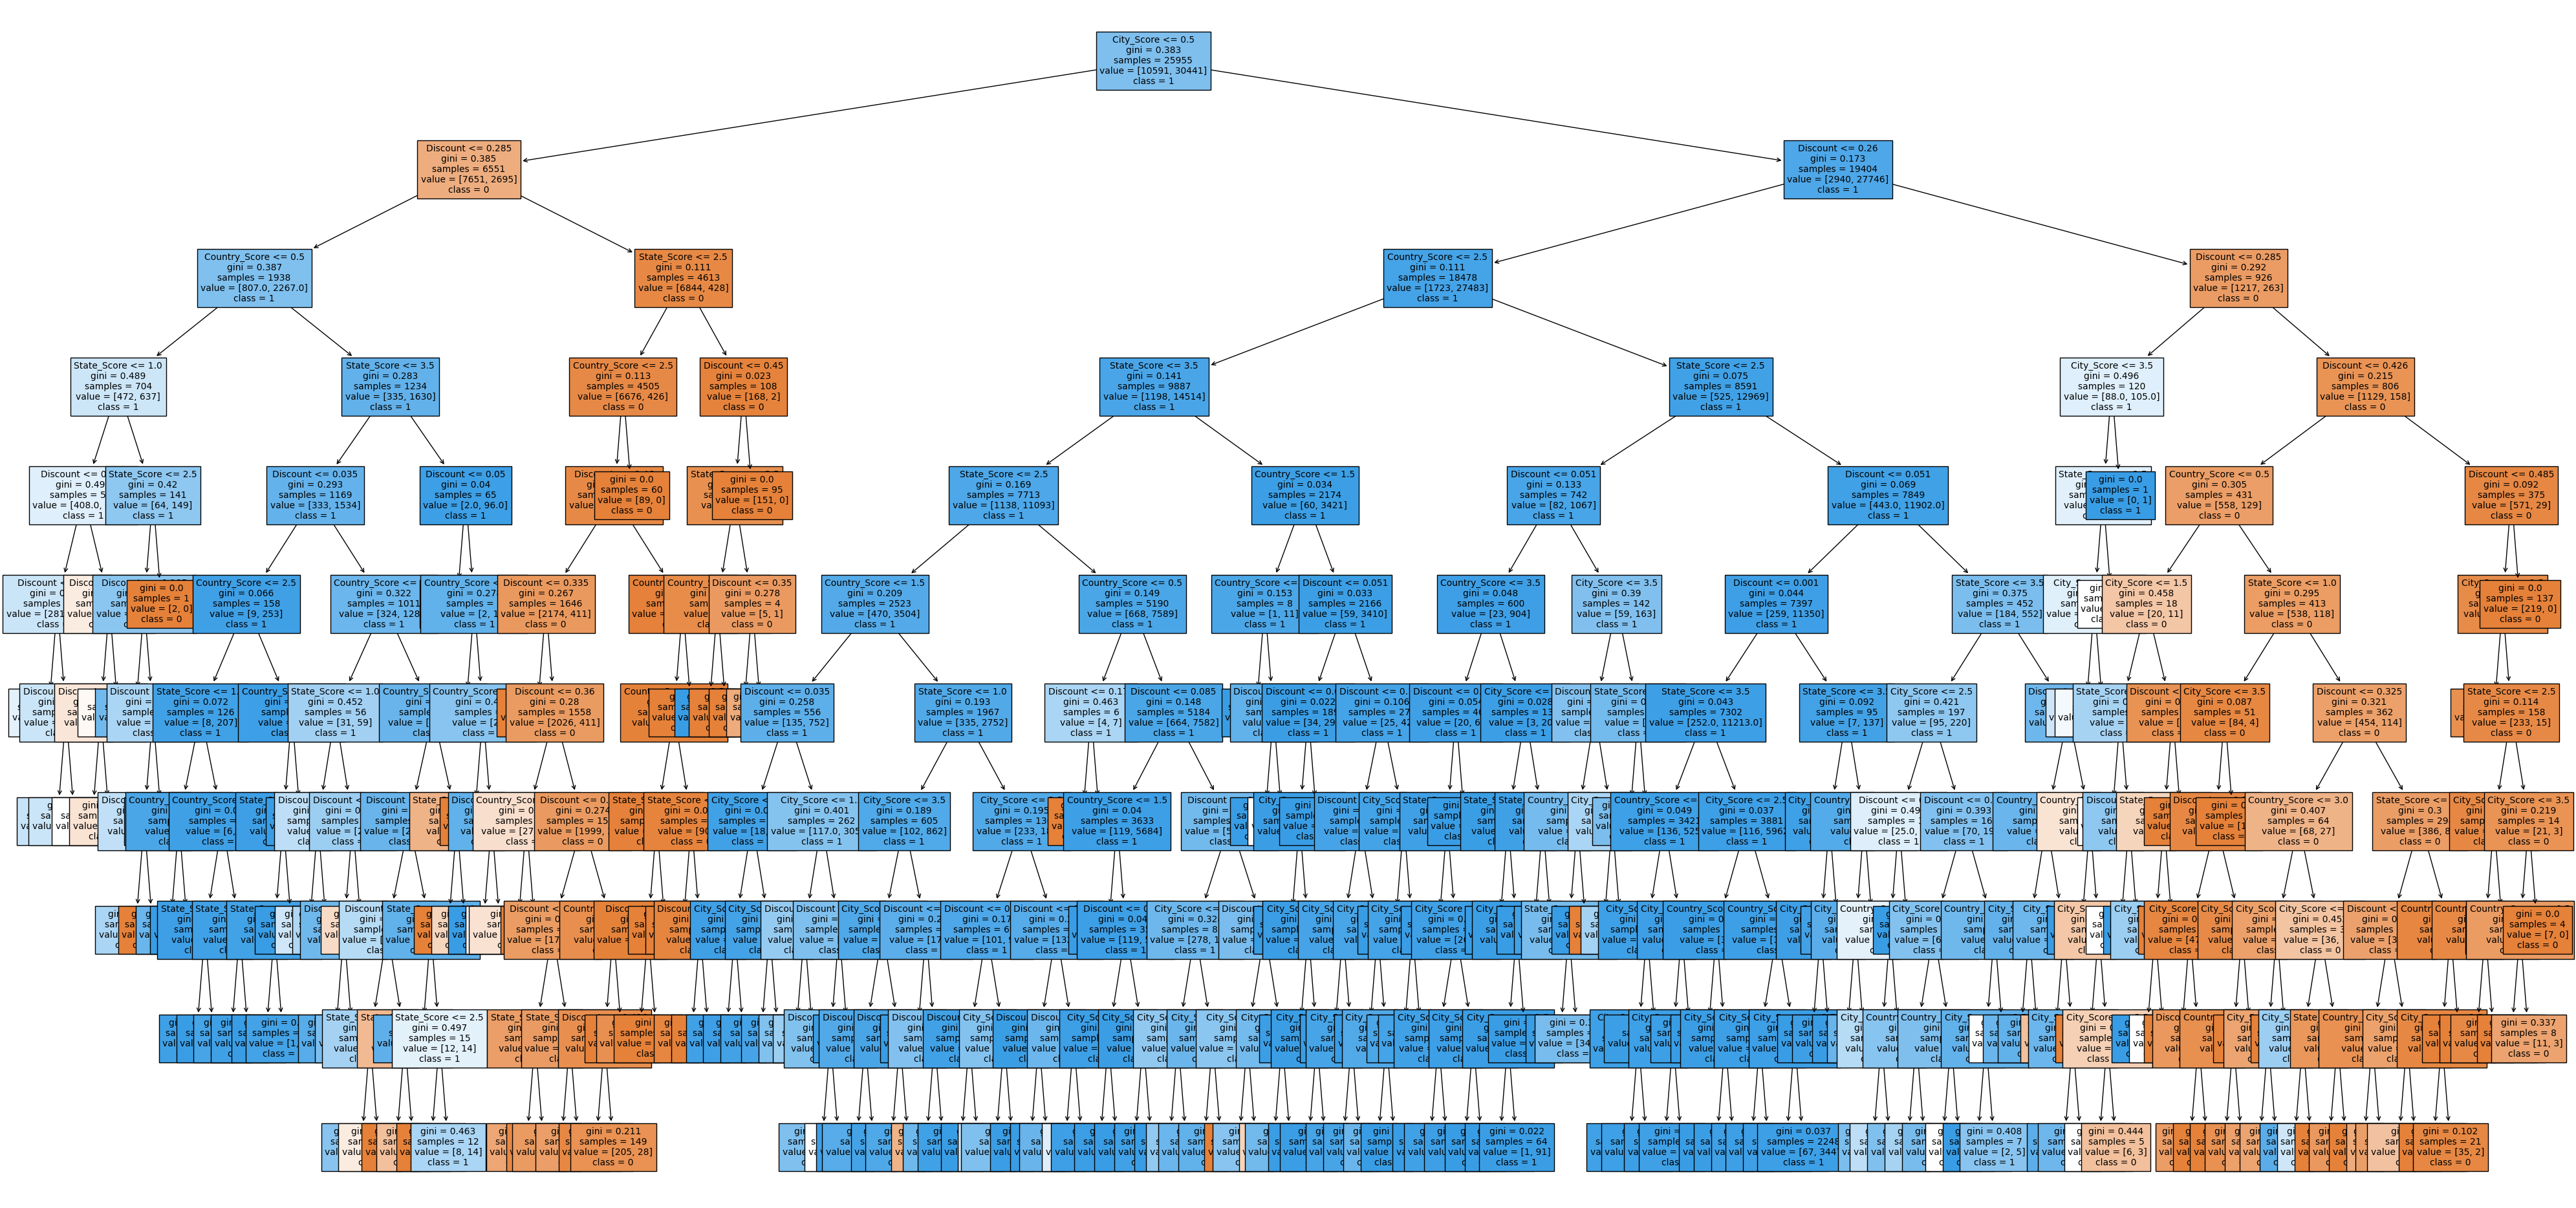

In [44]:
# Visualize one of the trees in the Random Forest
from sklearn import tree

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(best_rf.estimators_[0], feature_names=X_train.columns, class_names=['0', '1'], filled=True, fontsize=10)
plt.savefig('tree', dpi=100)
plt.show()

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Logistic Regression
param_grid_lr = [
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['l2'], 'class_weight': [None, 'balanced']},
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'class_weight': [None, 'balanced'], 'l1_ratio': [0.0, 0.5, 1.0] }
]

# Create a Grid Search CV for Logistic Regression
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=200, random_state=42), 
    param_grid=param_grid_lr, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

# Train the model
grid_search_lr.fit(X_train, y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Make predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f'Best Parameters for Logistic Regression: {grid_search_lr.best_params_}')
print(f'Accuracy for Logistic Regression: {accuracy_lr}')
print(f'Classification Report for Logistic Regression:\n{report_lr}')


Best Parameters for Logistic Regression: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.9197699356599727
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2591
           1       0.92      0.97      0.95      7667

    accuracy                           0.92     10258
   macro avg       0.92      0.87      0.89     10258
weighted avg       0.92      0.92      0.92     10258



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.9197699356599727')

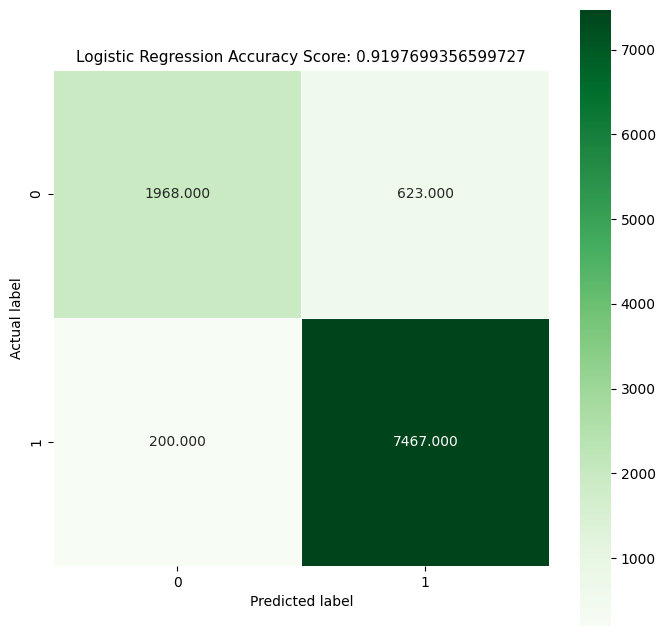

In [46]:
from sklearn import metrics

lg_cm = metrics.confusion_matrix(y_test,y_pred_lr)
lg_score = metrics.accuracy_score(y_test, y_pred_lr)

plt.figure(figsize=(8,8))
sns.heatmap(lg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Logistic Regression Accuracy Score: {0}'.format(lg_score)
plt.title(title, size = 11)

### Naive Bayes

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for GridSearchCV
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
}

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize GridSearchCV with the Naive Bayes classifier and parameter grid
grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Train the classifier on the training data
grid_search_nb.fit(X_train, y_train)

# Get the best model
best_nb = grid_search_nb.best_estimator_

# Make predictions on the test data using the best model
y_pred_nb = best_nb.predict(X_test)

# Evaluate the performance of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print(f"Best Naive Bayes parameters: {grid_search_nb.best_params_}")
print(f"Naive Bayes Classifier Accuracy: {accuracy_nb}")
print(f"Classification Report:\\n{classification_report_nb}")


Best Naive Bayes parameters: {'var_smoothing': 1e-09}
Naive Bayes Classifier Accuracy: 0.8776564632481966
Classification Report:\n              precision    recall  f1-score   support

           0       0.73      0.83      0.77      2591
           1       0.94      0.89      0.92      7667

    accuracy                           0.88     10258
   macro avg       0.83      0.86      0.85     10258
weighted avg       0.89      0.88      0.88     10258



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.8776564632481966')

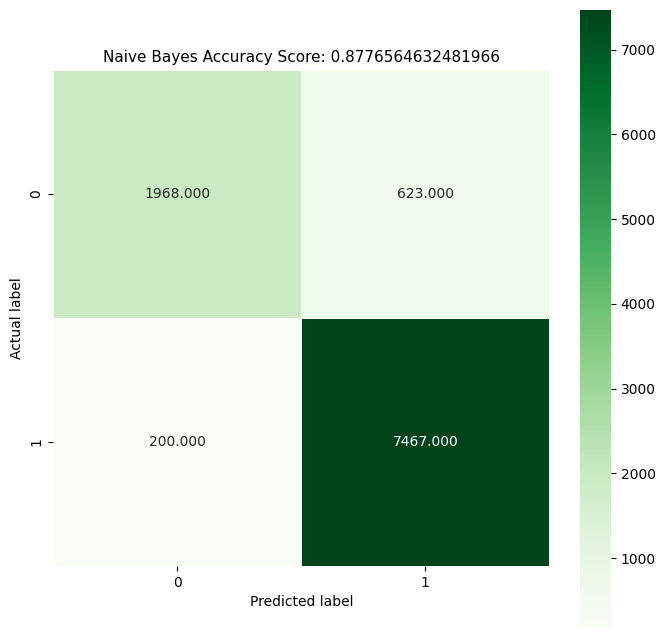

In [48]:
from sklearn import metrics

nb_cm = metrics.confusion_matrix(y_test,y_pred_nb)
nb_score = metrics.accuracy_score(y_test, y_pred_nb)

plt.figure(figsize=(8,8))
sns.heatmap(lg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(nb_score)
plt.title(title, size = 11)

### Perceptron

In [49]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for the Perceptron
param_grid_perceptron = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], # alpha values
    'max_iter': [1000, 2000, 3000, 4000],  # iterations
    'tol': [1e-3, 1e-4, 1e-5, 1e-6],  # stricter tolerance values
    'eta0': [1.0, 0.5, 0.1, 0.05, 0.01, 0.005] # learning rates
}

# Create Grid Search CV for Perceptron
grid_search_perceptron = GridSearchCV(
    estimator=Perceptron(random_state=42),
    param_grid=param_grid_perceptron,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the Perceptron model
grid_search_perceptron.fit(X_train, y_train)

# Get the best Perceptron model
best_perceptron = grid_search_perceptron.best_estimator_

# Prediction with the best Perceptron model
y_pred_perceptron = best_perceptron.predict(X_test)

# Evaluate the Perceptron model
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
report_perceptron = classification_report(y_test, y_pred_perceptron)

print(f'Best Parameters for Perceptron: {grid_search_perceptron.best_params_}')
print(f'Accuracy for Perceptron: {accuracy_perceptron}')
print(f'Classification Report for Perceptron:\n{report_perceptron}')


Best Parameters for Perceptron: {'alpha': 1e-05, 'eta0': 0.005, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 1e-05}
Accuracy for Perceptron: 0.8815558588418795
Classification Report for Perceptron:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2591
           1       0.94      0.90      0.92      7667

    accuracy                           0.88     10258
   macro avg       0.84      0.86      0.85     10258
weighted avg       0.89      0.88      0.88     10258



Text(0.5, 1.0, 'Perceptron Accuracy Score: 0.8815558588418795')

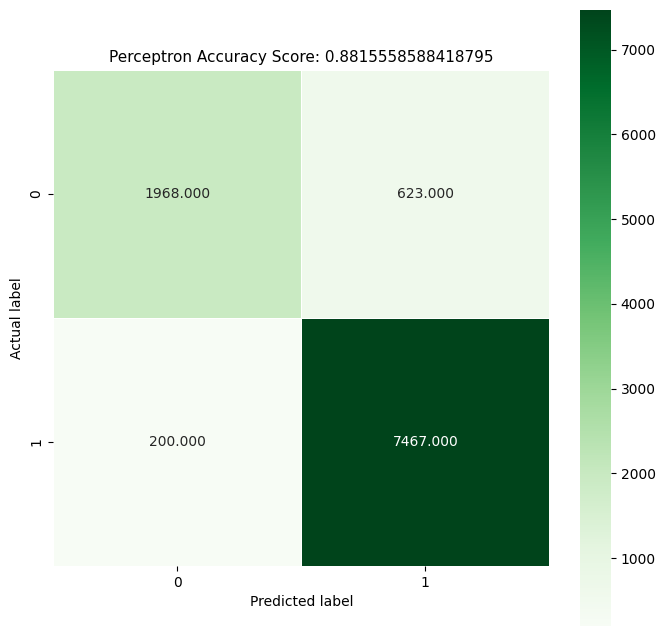

In [50]:
from sklearn import metrics

p_cm = metrics.confusion_matrix(y_test,y_pred_perceptron)
p_score = metrics.accuracy_score(y_test, y_pred_perceptron)

plt.figure(figsize=(8,8))
sns.heatmap(lg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Perceptron Accuracy Score: {0}'.format(p_score)
plt.title(title, size = 11)

# Save prediction results

### Gắn nhãn dự đoán trên toàn bộ data

In [51]:
df_important_feature = df[['Discount', 'City_Score', 'Country_Score', 'State_Score']]

In [52]:
df_predicted_labels_rf = best_rf.predict(df_important_feature)
df_predicted_labels_lr = best_lr.predict(df_important_feature)
df_predicted_labels_nb = best_nb.predict(df_important_feature)
df_predicted_labels_p = best_perceptron.predict(df_important_feature)

In [53]:
# Tạo DataFrame mới để lưu trữ các giá trị dự đoán và các thuộc tính gốc
df_predicted_data = pd.DataFrame({
    'Discount': df['Discount'],
    'City': df['City'],
    'City_Score': df['City_Score'],
    'State': df['State'],
    'State_Score': df['State_Score'],
    'Country': df['Country'],
    'Country_Score': df['Country_Score'],
    'Predicted_Label_RF': df_predicted_labels_rf,
    'Predicted_Label_LR': df_predicted_labels_lr,
    'Predicted_Label_NB': df_predicted_labels_nb,
    'Predicted_Label_P': df_predicted_labels_p,

})

In [54]:
# Lưu DataFrame này xuống file CSV
df_predicted_data.to_csv('predicted_data_with_df.csv', index=False)

# Save Model

In [55]:
import pickle
# Save the best model
with open('model/RandomForest.sav', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

In [56]:
import pickle
# Save the best model
with open('model/LogisticRegression.sav', 'wb') as model_file:
    pickle.dump(best_lr, model_file)

In [57]:
import pickle
# Save the best model
with open('model/NaiveBayes.sav', 'wb') as model_file:
    pickle.dump(best_nb, model_file)

In [58]:
import pickle
# Save the best model
with open('model/Perceptron.sav', 'wb') as model_file:
    pickle.dump(best_perceptron, model_file)

# Save score data

In [59]:
# Lấy các giá trị duy nhất cho 'City_Score'
unique_city_score = df[['City', 'City_Score']].drop_duplicates().sort_values(by='City_Score')
unique_city_score.to_csv('data/city_score.csv', index=False)

# Lấy các giá trị duy nhất cho 'State_Score'
unique_state_score = df[['State', 'State_Score']].drop_duplicates().sort_values(by='State_Score')
unique_state_score.to_csv('data/state_score.csv', index=False)

# Lấy các giá trị duy nhất cho 'Country_Score'
unique_country_score = df[['Country', 'Country_Score']].drop_duplicates().sort_values(by='Country_Score')
unique_country_score.to_csv('data/country_score.csv', index=False)


# Nhận xét hiệu suất thuật toán

+ Random Forest: 92.08 %
+ Logistic Regresson: 91.97 %
+ Naive Bayes: 87.76 %
+ Perceptron: độ chính xác đạt 88.15 %

Thuật toán có hiệu suất tốt nhất là Random Forest, tiếp đến là Logistic Regression, Perceptron, Naive Bayes